## Newton法でeを求める

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark", {'grid.linestyle': '--'})

def f(x):
    return np.log(x)-1
def df(x):
    return 1/x
def newton(x):
    return x*(2-np.log(x))

init:	 0.5
0 :	 1.3465735902799727
1 :	 2.2924563198280237
2 :	 2.6830361524546436
3 :	 2.7180523338847156
4 :	 2.7182818187710795


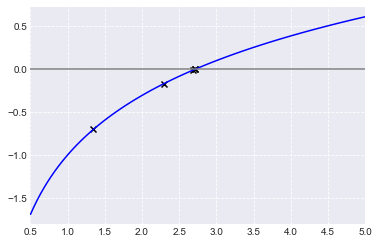

In [2]:
x = np.linspace(0.5,5,100)
plt.plot(x,f(x),"b")
plt.plot([x[0],x[-1]],[0,0],color="gray")
plt.xlim(x[0],x[-1])
x = 0.5
print("init:\t",x)
for i in range(5):
    x = newton(x)
    print(i,":\t",x)
    plt.scatter(x,f(x),marker="x",color="black")
plt.grid()
plt.savefig("figures/sup_newton-log.pdf")

## Runge-Kutta
3次元RungeKutta法を用いて、ローレンツ方程式を数値的に解く

In [3]:
def fx(x,y,z,t,a):
    return a*(y-x)
def fy(x,y,z,t,b):
    return b*x-y-x*z
def fz(x,y,z,t,c):
    return x*y - c*z

a, b, c = 10, 28, 8/3
x, y, z = 1.5, 0.5, 0.5
t = 0
dt = 0.01
xs = []
ys = []
zs = []
N = 5000

for i in range(N):
    # x
    x_k1 = dt * fx(x,y,z,t,a)
    x_k2 = dt * fx(x + 0.5*x_k1,y+0.5*x_k1, z+0.5*x_k1, t+0.5*dt, a)
    x_k3 = dt * fx(x + 0.5*x_k2,y+0.5*x_k2, z+0.5*x_k2, t+0.5*dt, a)
    x_k4 = dt * fx(x + x_k3, y+x_k3, z+x_k3, t +dt,a)
    # y
    y_k1 = dt * fy(x,y,z,t,b)
    y_k2 = dt * fy(x + 0.5*y_k1,y+0.5*y_k1,z+0.5*y_k1, t+0.5*dt, b)
    y_k3 = dt * fy(x + 0.5*y_k2,y+0.5*y_k2,z+0.5*y_k2, t+0.5*dt, b)
    y_k4 = dt * fy(x + y_k3, y+y_k3,z+y_k3, t +dt,b)
    # z
    z_k1 = dt * fz(x,y,z,t,a)
    z_k2 = dt * fz(x + 0.5*z_k1,y+0.5*z_k1,z+0.5*z_k1, t+0.5*dt, c)
    z_k3 = dt * fz(x + 0.5*z_k2,y+0.5*z_k2,z+0.5*z_k2, t+0.5*dt, c)
    z_k4 = dt * fz(x + z_k3, y+z_k3,z+z_k3, t +dt,c)
    # update
    x += (x_k1 + 2*x_k2 + 2*x_k3 + x_k4) / 6
    y += (y_k1 + 2*y_k2 + 2*y_k3 + y_k4) / 6
    z += (z_k1 + 2*z_k2 + 2*z_k3 + z_k4) / 6
    t += dt
    # append
    xs.append(x)
    ys.append(y)
    zs.append(z)

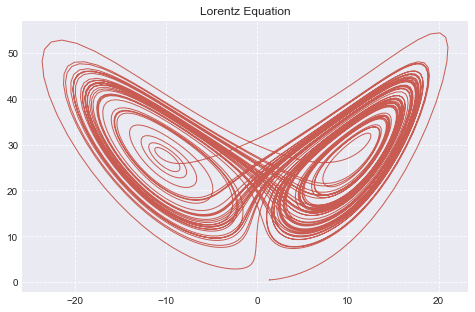

In [4]:
fig = plt.figure(figsize=(8,5))
plt.plot(xs,zs,"blue",alpha=0.8,lw=1,color="#c0392b")
plt.title("Lorentz Equation")
plt.grid()
plt.savefig("figures/sup-lorentz.pdf")


## t-distribution
自由度と形状の関係

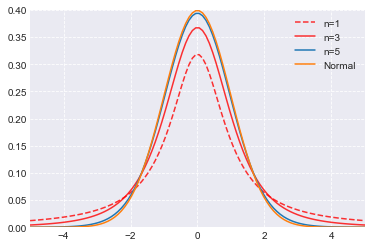

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import t, norm
import numpy as np

x = np.linspace(-5,5,100)

# t分布
plt.plot(x, t(1).pdf(x),label="n=1",color="red",alpha=0.8,linestyle="--")
plt.plot(x, t(3).pdf(x),label="n=3",color="red",alpha=0.8)
plt.plot(x, t(20).pdf(x),label="n=5")
# 正規分布
plt.plot(x, norm(0,1).pdf(x),label="Normal")
plt.xlim(x[0],x[-1])
plt.ylim(0,0.4)
plt.grid()
plt.legend()
plt.savefig("figures/sup-tdist.pdf")

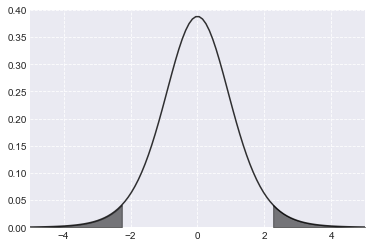

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import t, norm
import numpy as np

x = np.linspace(-5,5,100)
x_right = np.linspace(2.26,5,100)
x_left = np.linspace(-5,-2.26,100)

# t分布
plt.plot(x, t(9).pdf(x),color="black", alpha=0.8)
plt.fill_between(x_right,0,t(9).pdf(x_right),color="black", alpha=0.5)
plt.fill_between(x_left,0,t(9).pdf(x_left),color="black", alpha=0.5)

# 正規分布
plt.xlim(x[0],x[-1])
plt.ylim(0,0.4)
plt.grid()
plt.savefig("figures/sup-table.pdf")